<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.


__Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    
__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

----

#### Exercício 1: Regressão Linear

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1, make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

1- Usando a função getData(), carregue os dados disponibilizados.

In [3]:
X, y = getData()
X.shape, y.shape

((10000, 5), (10000,))

In [4]:
X

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       ...,
       [0.2558884 , 0.19185257, 0.31889167, 0.97098671, 0.45826743],
       [0.65071484, 0.87733698, 0.60242322, 0.42648218, 0.65573615],
       [0.5463288 , 0.69331045, 0.23367488, 0.83092388, 0.55131786]])

In [5]:
y

array([15.28814034, 21.53563265, 15.33477388, ..., 13.55427826,
       20.05388514, 18.67813117])

In [6]:
X1=np.arange(0,len(X),1)

In [7]:
X1

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [8]:
X1.shape

(10000,)

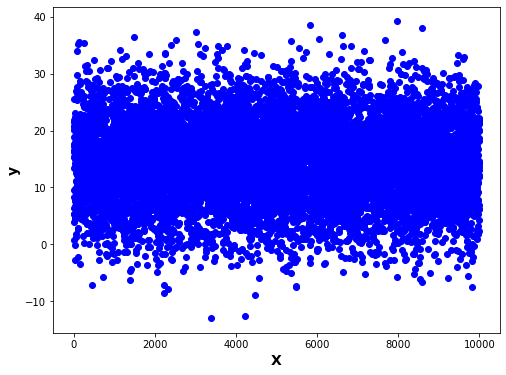

In [9]:
plt.figure(figsize=[8,6])
plt.scatter(X1, y, c = 'blue')
plt.xlabel("X", fontsize = 14, fontweight = 'bold')
plt.ylabel("y", fontsize = 14, fontweight = 'bold')
plt.show()

2- Separe parte dos dados para o dataset de teste.

In [10]:
# Como os dados já estão aleatorizado, a separação foi feita com 7500 instâncias para treino e 2500 para teste

Xtrain, Xtest, ytrain, ytest = X[:7500], X[7500:], y[:7500], y[7500:]

In [11]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((7500, 5), (2500, 5), (7500,), (2500,))

In [12]:
Xtrain1=np.arange(0,len(Xtrain),1)

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

In [13]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [14]:
rg = regLinear(learning_rate = 0.075, num_steps = 200)

In [15]:
rg.fit(Xtrain, ytrain)

modelo treinado.


In [16]:
rg.theta_final

array([[ 2.33741873],
       [ 5.3025595 ],
       [ 6.14172195],
       [-0.15608272],
       [ 9.32288933],
       [ 3.6626737 ]])

In [17]:
rg.predict(Xtrain)

array([16.17754318, 18.69920175, 18.58466838, ..., 11.43276925,
       12.30601453, 15.80539562])

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression()

In [21]:
lm.intercept_, lm.coef_

(-0.17502201577241294,
 array([ 6.34642766,  7.32237956,  0.22274329, 10.58969836,  4.66476975]))

In [23]:
lm.predict(Xtrain)

array([16.42553332, 19.3204787 , 18.98205719, ..., 10.69464464,
       11.82863968, 16.26278406])

Os resultados foram similares.

----

Regressão Polinomial

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

In [48]:
#importando a função
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#criando uma função polinomial de ordem 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [50]:
Xtrain_poly = poly_features.fit_transform(Xtrain)
Xtrain_poly.shape

(7500, 20)

In [51]:
Xtrain_poly[:10]

array([[5.48813504e-01, 7.15189366e-01, 6.02763376e-01, 5.44883183e-01,
        4.23654799e-01, 3.01196262e-01, 3.92505582e-01, 3.30804680e-01,
        2.99039249e-01, 2.32507475e-01, 5.11495830e-01, 4.31089957e-01,
        3.89694658e-01, 3.02993407e-01, 3.63323688e-01, 3.28435627e-01,
        2.55363597e-01, 2.96897683e-01, 2.30842376e-01, 1.79483389e-01],
       [6.45894113e-01, 4.37587211e-01, 8.91773001e-01, 9.63662761e-01,
        3.83441519e-01, 4.17179205e-01, 2.82635004e-01, 5.75990931e-01,
        6.22424104e-01, 2.47662620e-01, 1.91482567e-01, 3.90228460e-01,
        4.21686500e-01, 1.67789105e-01, 7.95259085e-01, 8.59368432e-01,
        3.41942794e-01, 9.28645916e-01, 3.69508313e-01, 1.47027398e-01],
       [7.91725038e-01, 5.28894920e-01, 5.68044561e-01, 9.25596638e-01,
        7.10360582e-02, 6.26828536e-01, 4.18739350e-01, 4.49735102e-01,
        7.32818034e-01, 5.62410259e-02, 2.79729836e-01, 3.00435883e-01,
        4.89543360e-01, 3.75706103e-02, 3.22674623e-01, 5.2578

In [52]:
poly_fit = LinearRegression() #também poderíamos ter usado nossa classe regLinear com gradient descent
poly_fit.fit(Xtrain_poly, ytrain)

poly_fit.intercept_, poly_fit.coef_

(0.22128329903067723,
 array([ 1.83038276e+01,  1.90862348e+01, -2.15788698e+01,  7.91467118e+00,
         5.11421052e+00, -1.25388135e+01, -2.59190937e-03,  1.62596449e-01,
         1.30648628e+00, -1.95537201e-01, -1.21029752e+01,  4.10000805e-01,
         6.41601799e-01, -5.36078784e-01,  2.06897119e+01,  1.57215660e+00,
        -2.01658918e-01,  6.92060407e-01,  4.38505005e-01, -1.52141136e-01]))

----

Exercício: Regressão Logística:

Parte 1:

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

- médoto fit: para treinar o modelo - usando gradient descent

- médoto predict_proba: para retornar a probabilidade da classe 1

- médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
Parte 2:

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [57]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [63]:
X, y = getData2()
X.shape, y.shape

((10000, 5), (10000,))

In [64]:
#implementando a função de perda logarítmica - Log Loss

def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [65]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [66]:
#implementação do gradient descent para treinamento da regressão logística


learning_rate = 0.01
num_steps = 100

#criando uma coluna de 1's no dataset X 
X_b = np.c_[np.ones(X.shape[0]), X]

#instanciando um vetor de parâmetros theta aleatório
theta = np.random.randn(X_b.shape[1],1)


for step in range(num_steps):
    
    print('passo:', step)
    print('theta:', theta.reshape(-1,))
    
    #calculando a probabilidade 
    yscores = sigmoid(X_b.dot(theta))
    
    #calculando o gradiente da Log Loss
    gradient = X_b.T.dot(yscores - y)
    
    #atualizando os pesos
    theta = theta - learning_rate * gradient
    
    #calculando a Log Loss dentro do passo
    logloss_step = logLossCost(ytrue = y, ypred_probs = yscores)
    print("Log Loss:", logloss_step)
    print('\n-----------------------------------------------------------\n')
    
theta_final = theta

passo: 0
theta: [-0.10975646 -1.59101152  0.09648674 -0.50366782  0.69843334  1.30565748]
Log Loss: 1.1334217439048748

-----------------------------------------------------------

passo: 1
theta: [-49.00564345  50.99435655  50.99435655 ... -17.08581395 -17.08581395
 -17.08581395]
Log Loss: nan

-----------------------------------------------------------

passo: 2
theta: [-64.73435749  66.3542508   66.3542508  ...  -9.78070005  -9.78070005
  -9.78070005]
Log Loss: nan

-----------------------------------------------------------

passo: 3
theta: [-64.73435749  66.3542508   66.3542508  ...  -9.78070005  -9.78070005
  -9.78070005]
Log Loss: nan

-----------------------------------------------------------

passo: 4
theta: [-64.73435749  66.3542508   66.3542508  ...  -9.78070005  -9.78070005
  -9.78070005]
Log Loss: nan

-----------------------------------------------------------

passo: 5
theta: [-64.73435749  66.3542508   66.3542508  ...  -9.78070004  -9.78070004
  -9.78070004]
Log Loss: 

Log Loss: nan

-----------------------------------------------------------

passo: 47
theta: [-64.73435754  66.3542508   66.3542508  ...  -9.78069988  -9.78069988
  -9.78069988]
Log Loss: nan

-----------------------------------------------------------

passo: 48
theta: [-64.73435754  66.3542508   66.3542508  ...  -9.78069988  -9.78069988
  -9.78069988]
Log Loss: nan

-----------------------------------------------------------

passo: 49
theta: [-64.73435754  66.3542508   66.3542508  ...  -9.78069987  -9.78069987
  -9.78069987]
Log Loss: nan

-----------------------------------------------------------

passo: 50
theta: [-64.73435754  66.3542508   66.3542508  ...  -9.78069987  -9.78069987
  -9.78069987]
Log Loss: nan

-----------------------------------------------------------

passo: 51
theta: [-64.73435754  66.3542508   66.3542508  ...  -9.78069987  -9.78069987
  -9.78069987]
Log Loss: nan

-----------------------------------------------------------

passo: 52
theta: [-64.73435755  66

Log Loss: nan

-----------------------------------------------------------

passo: 94
theta: [-64.7343576  66.3542508  66.3542508 ...  -9.7806997  -9.7806997
  -9.7806997]
Log Loss: nan

-----------------------------------------------------------

passo: 95
theta: [-64.7343576  66.3542508  66.3542508 ...  -9.7806997  -9.7806997
  -9.7806997]
Log Loss: nan

-----------------------------------------------------------

passo: 96
theta: [-64.7343576   66.3542508   66.3542508  ...  -9.78069969  -9.78069969
  -9.78069969]
Log Loss: nan

-----------------------------------------------------------

passo: 97
theta: [-64.7343576   66.3542508   66.3542508  ...  -9.78069969  -9.78069969
  -9.78069969]
Log Loss: nan

-----------------------------------------------------------

passo: 98
theta: [-64.7343576   66.3542508   66.3542508  ...  -9.78069968  -9.78069968
  -9.78069968]
Log Loss: nan

-----------------------------------------------------------

passo: 99
theta: [-64.7343576   66.3542508   6

In [67]:
#fazendo as predições com o theta final

probs = sigmoid(X_b.dot(theta_final))
probs

array([[6.63932020e-36, 1.00000000e+00, 1.00000000e+00, ...,
        6.63932020e-36, 6.63932020e-36, 6.63932020e-36],
       [1.12247861e-21, 1.00000000e+00, 1.00000000e+00, ...,
        1.12247861e-21, 1.12247861e-21, 1.12247861e-21],
       [1.04490069e-26, 1.00000000e+00, 1.00000000e+00, ...,
        1.04490069e-26, 1.04490069e-26, 1.04490069e-26],
       ...,
       [2.13262283e-20, 1.00000000e+00, 1.00000000e+00, ...,
        2.13262283e-20, 2.13262283e-20, 2.13262283e-20],
       [1.05521762e-22, 1.00000000e+00, 1.00000000e+00, ...,
        1.05521762e-22, 1.05521762e-22, 1.05521762e-22],
       [6.55159768e-19, 1.00000000e+00, 1.00000000e+00, ...,
        6.55159768e-19, 6.55159768e-19, 6.55159768e-19]])

In [68]:
limiar = 0.5
ypred = np.where(probs > limiar, 1, 0)
ypred

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])